In [121]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [122]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore

In [123]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/talking_data.csv")

In [124]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [125]:
print("Dimension of dataset:", data.shape)

Dimension of dataset: (100000, 8)


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [127]:
data['click_time']=pd.to_datetime(data['click_time'])

In [128]:
data['month']=data['click_time'].apply(lambda x:x.month)
data.head()


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,11
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,11
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,11
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,11
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,11


In [129]:
data['day']=data['click_time'].apply(lambda x:x.day)
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,11,7
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,11,7
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,11,7
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,11,7
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,11,9


In [130]:
data['year']=data['click_time'].apply(lambda x:x.year)
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day,year
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,11,7,2017
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,11,7,2017
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,11,7,2017
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,11,7,2017
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,11,9,2017


In [131]:
data['hour']=data['click_time'].apply(lambda x:x.hour)
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day,year,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,11,7,2017,9
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,11,7,2017,13
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,11,7,2017,18
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,11,7,2017,4
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,11,9,2017,9


In [132]:
data['minute']=data['click_time'].apply(lambda x:x.minute)
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,month,day,year,hour,minute
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,11,7,2017,9,30
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,11,7,2017,13,40
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,11,7,2017,18,5
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,11,7,2017,4,58
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,11,9,2017,9,0


In [133]:
data.describe()

,ip,app,device,os,channel,is_attributed,month,day,year,hour,minute
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.0,100000.000000,100000.00000
mean,91255.879670,12.04788,21.771250,22.818280,268.832460,0.002270,11.0,7.861460,2017.0,9.328590,29.15540
std,69835.553661,14.94150,259.667767,55.943136,129.724248,0.047591,0.0,0.889266,0.0,6.180586,17.36966
min,9.000000,1.00000,0.000000,0.000000,3.000000,0.000000,11.0,6.000000,2017.0,0.000000,0.00000
25%,40552.000000,3.00000,1.000000,13.000000,145.000000,0.000000,11.0,7.000000,2017.0,4.000000,14.00000
50%,79827.000000,12.00000,1.000000,18.000000,258.000000,0.000000,11.0,8.000000,2017.0,9.000000,29.00000
75%,118252.000000,15.00000,1.000000,19.000000,379.000000,0.000000,11.0,9.000000,2017.0,14.000000,44.00000
max,364757.000000,551.00000,3867.000000,866.000000,498.000000,1.000000,11.0,9.000000,2017.0,23.000000,59.00000


In [134]:
data.isnull().values.any()

True

In [135]:
miss_val = data.isna().sum()
miss_val

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
month                  0
day                    0
year                   0
hour                   0
minute                 0
dtype: int64

In [136]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  227 non-null     object        
 7   is_attributed    100000 non-null  int64         
 8   month            100000 non-null  int64         
 9   day              100000 non-null  int64         
 10  year             100000 non-null  int64         
 11  hour             100000 non-null  int64         
 12  minute           100000 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 9.9+ MB
None
     

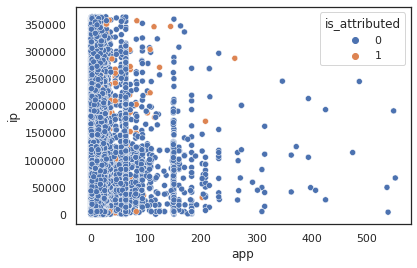

In [137]:
sns.scatterplot(x='app',y='ip', hue='is_attributed', data=data)

In [138]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where

Counter({0: 99773, 1: 99773})
Counter({0: 99773, 1: 99773})


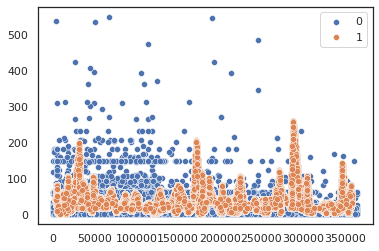

In [172]:
data = make_classification(n_samples=100000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=100)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	sns.scatterplot(x[row_ix, 0], x[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [139]:
corr = data.corr()
corr

,ip,app,device,os,channel,is_attributed,month,day,year,hour,minute
ip,1.000000,0.010400,-0.001499,-0.000470,0.007563,0.054955,NaN,0.057067,NaN,-0.007955,0.000207
app,0.010400,1.000000,0.248376,0.247160,-0.028238,0.064426,NaN,-0.032182,NaN,0.026079,0.001445
device,-0.001499,0.248376,1.000000,0.924456,-0.035398,-0.000695,NaN,-0.040110,NaN,0.012035,-0.001015
os,-0.000470,0.247160,0.924456,1.000000,-0.033175,0.006183,NaN,-0.031336,NaN,0.014660,-0.000650
channel,0.007563,-0.028238,-0.035398,-0.033175,1.000000,-0.023336,NaN,0.000265,NaN,-0.021326,-0.001302
is_attributed,0.054955,0.064426,-0.000695,0.006183,-0.023336,1.000000,NaN,-0.000603,NaN,-0.002944,-0.004334
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,0.057067,-0.032182,-0.040110,-0.031336,0.000265,-0.000603,NaN,1.000000,NaN,-0.274896,0.004493
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hour,-0.007955,0.026079,0.012035,0.014660,-0.021326,-0.002944,NaN,-0.274896,NaN,1.000000,0.002066


In [140]:
data=data.drop(['month','year'], axis=1)
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0,7,9,30
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0,7,13,40
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0,7,18,5
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0,7,4,58
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0,9,9,0


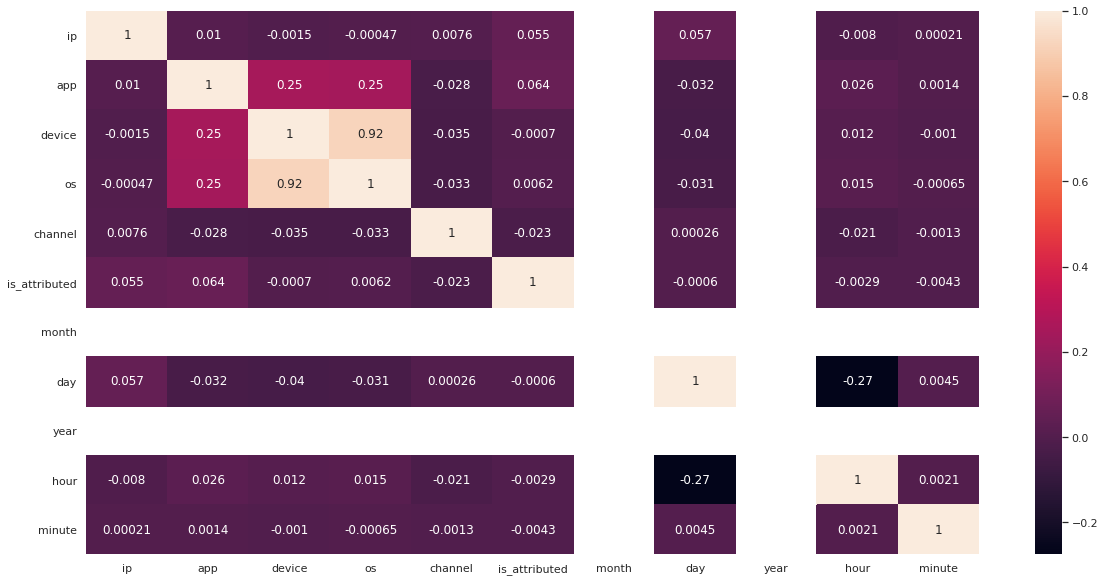

In [141]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [142]:
data.dtypes

ip                          int64
app                         int64
device                      int64
os                          int64
channel                     int64
click_time         datetime64[ns]
attributed_time            object
is_attributed               int64
day                         int64
hour                        int64
minute                      int64
dtype: object

In [143]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = pd.Categorical(data[feature]).codes

data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ip               100000 non-null  int64         
 1   app              100000 non-null  int64         
 2   device           100000 non-null  int64         
 3   os               100000 non-null  int64         
 4   channel          100000 non-null  int64         
 5   click_time       100000 non-null  datetime64[ns]
 6   attributed_time  100000 non-null  int16         
 7   is_attributed    100000 non-null  int64         
 8   day              100000 non-null  int64         
 9   hour             100000 non-null  int64         
 10  minute           100000 non-null  int64         
dtypes: datetime64[ns](1), int16(1), int64(9)
memory usage: 7.8 MB


(None,                   ip           app  ...           hour        minute
 count  100000.000000  100000.00000  ...  100000.000000  100000.00000
 mean    91255.879670      12.04788  ...       9.328590      29.15540
 std     69835.553661      14.94150  ...       6.180586      17.36966
 min         9.000000       1.00000  ...       0.000000       0.00000
 25%     40552.000000       3.00000  ...       4.000000      14.00000
 50%     79827.000000      12.00000  ...       9.000000      29.00000
 75%    118252.000000      15.00000  ...      14.000000      44.00000
 max    364757.000000     551.00000  ...      23.000000      59.00000
 
 [8 rows x 10 columns])

In [144]:
X = data.iloc[:, :-1]
display(X)

Y = data.iloc[:, -1]
display(Y)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour
0,87540,12,1,13,497,2017-11-07 09:30:38,-1,0,7,9
1,105560,25,1,17,259,2017-11-07 13:40:27,-1,0,7,13
2,101424,12,1,19,212,2017-11-07 18:05:24,-1,0,7,18
3,94584,13,1,13,477,2017-11-07 04:58:08,-1,0,7,4
4,68413,12,1,1,178,2017-11-09 09:00:09,-1,0,9,9
...,...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,-1,0,9,13
99996,85150,9,1,13,244,2017-11-07 11:25:43,-1,0,7,11
99997,18839,3,1,13,19,2017-11-08 11:38:42,-1,0,8,11
99998,114276,15,1,12,245,2017-11-08 17:55:21,-1,0,8,17


0        30
1        40
2         5
3        58
4         0
         ..
99995    25
99996    25
99997    38
99998    55
99999    32
Name: minute, Length: 100000, dtype: int64

In [145]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [146]:
x = data.drop(['click_time','is_attributed'], axis=1)
y = data['is_attributed']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [148]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [149]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=10)
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
Y_pred = classifier.predict(X_test)

In [151]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [152]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, Y_pred, labels=[0,1]))
print(metrics.classification_report(y_test, Y_pred, labels=[0,1]))

[[19961     0]
 [    3    36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19961
           1       1.00      0.92      0.96        39

    accuracy                           1.00     20000
   macro avg       1.00      0.96      0.98     20000
weighted avg       1.00      1.00      1.00     20000



In [154]:
sm = SMOTE(sampling_strategy=0.5,random_state=100)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}\n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (119718, 9)
After OverSampling, the shape of train_y: (119718,)

After OverSampling, counts of label '1': 39906
After OverSampling, counts of label '0': 79812


Accuracy  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19961
           1       1.00      1.00      1.00        39

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



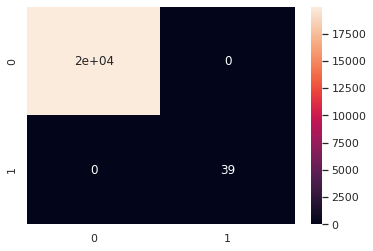

In [157]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr = LogisticRegression() 
lr.fit(X_train_res, y_train_res.ravel()) 
predictions = lr.predict(X_test) 
  
print('Accuracy ',accuracy_score(y_test,predictions))
print(classification_report(y_test, predictions)) 
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2g')

In [110]:
ZX = preprocessing.scale(x)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.2, random_state=10)

In [111]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl_score=rfcl.score(X_test , y_test)
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The confusion matrix of Random Forest Model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Random forest model accuracy is 1.0
The confusion matrix of Random Forest Model is
[[19961     0]
 [    0    39]]


In [81]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier( n_estimators= 20)
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
abcl_score=abcl.score(X_test, y_test)
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The confusion matrix of Adaboost Ensemble model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Adaboost Ensemble model accuracy is 0.99765
The confusion matrix of Adaboost Ensemble model is
[[19951    10]
 [   37     2]]


In [82]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)
test_pred = bgcl.predict(X_test)
bgcl_score=bgcl.score(X_test, y_test)
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The confusion matrix of Bagging classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Bagging classifier model accuracy is 0.99815
The confusion matrix of Bagging classifier model is
[[19954     7]
 [   30     9]]


In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.05)
gbcl = gbcl.fit(X_train, y_train)
test_pred = gbcl.predict(X_test)
gbcl_score=gbcl.score(X_test , y_test)
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))
print("The confusion matrix of Gradient Boost classifier model is")
print(metrics.confusion_matrix(y_test,test_pred))

The Gradient Boost classifier model accuracy is 0.99765
The confusion matrix of Gradient Boost classifier model is
[[19950    11]
 [   36     3]]


In [84]:
print("The Random forest model accuracy is {}".format(rfcl_score))
print("The Adaboost Ensemble model accuracy is {}".format(abcl_score))
print("The Bagging classifier model accuracy is {}".format(bgcl_score))
print("The Gradient Boost classifier model accuracy is {}".format(gbcl_score))


The Random forest model accuracy is 0.99805
The Adaboost Ensemble model accuracy is 0.99765
The Bagging classifier model accuracy is 0.99815
The Gradient Boost classifier model accuracy is 0.99765


**We can see that the best performance is achieved by a bagged decision tree classifier.**

**Decision tree Classifier**

In [87]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20)

In [88]:
train_x = train.drop(['click_time','is_attributed'], axis = 1)
train_y = train['is_attributed']             

test_x = test.drop(['click_time','is_attributed'],axis = 1)
test_y = test['is_attributed']

In [90]:
print('Dimension of train_x :',train_x.shape)
print('Dimension of train_y :',train_y.shape)
print('Dimension of test_x :',test_x.shape)
print('Dimension of test_y :',test_y.shape)

Dimension of train_x : (80000, 8)
Dimension of train_y : (80000,)
Dimension of test_x : (20000, 8)
Dimension of test_y : (20000,)


In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="gini")
clf.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [92]:
pred = clf.predict(test_x)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [93]:
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred,test_y)*100,2)))

The accuracy of the Decision Tree is 99.76%


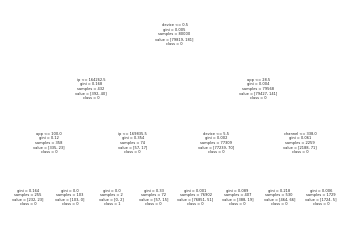

In [94]:
from sklearn import tree

tree.plot_tree(clf,feature_names = ['ip', 'app', 'device', 'os','channel','day','is_attributed','hour'], 
               class_names= ['0', '1'],proportion = False)
plt.show()

In [95]:
from sklearn.tree.export import export_text
r = export_text(clf, feature_names = ['ip', 'app', 'device', 'os','channel','day','is_attributed','hour'])
print(r)

|--- device <= 0.50
|   |--- ip <= 164262.50
|   |   |--- app <= 100.00
|   |   |   |--- class: 0
|   |   |--- app >  100.00
|   |   |   |--- class: 0
|   |--- ip >  164262.50
|   |   |--- ip <= 169835.50
|   |   |   |--- class: 1
|   |   |--- ip >  169835.50
|   |   |   |--- class: 0
|--- device >  0.50
|   |--- app <= 28.50
|   |   |--- device <= 5.50
|   |   |   |--- class: 0
|   |   |--- device >  5.50
|   |   |   |--- class: 0
|   |--- app >  28.50
|   |   |--- channel <= 338.00
|   |   |   |--- class: 0
|   |   |--- channel >  338.00
|   |   |   |--- class: 0



**Decision tree classifier for model building by "entropy"**

In [96]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0,max_depth=3,criterion="entropy")
clf1.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [97]:
pred1 = clf1.predict(test_x)
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [98]:
from sklearn.metrics import accuracy_score

print('The accuracy of the Decision Tree is {}%'.format(round(accuracy_score(pred1,test_y)*100,2)))

The accuracy of the Decision Tree is 99.77%


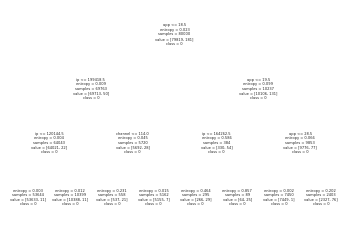

In [99]:
from sklearn import tree

tree.plot_tree(clf1,feature_names = ['ip', 'app', 'device', 'os','channel','day','is_attributed','hour'], 
               class_names= ['0', '1'],proportion = False)
plt.show()

In [100]:
from sklearn.tree.export import export_text
r = export_text(clf1, feature_names = ['ip', 'app', 'device', 'os','channel','day','is_attributed','hour'])
print(r)

|--- app <= 18.50
|   |--- ip <= 199418.50
|   |   |--- ip <= 120144.50
|   |   |   |--- class: 0
|   |   |--- ip >  120144.50
|   |   |   |--- class: 0
|   |--- ip >  199418.50
|   |   |--- channel <= 114.00
|   |   |   |--- class: 0
|   |   |--- channel >  114.00
|   |   |   |--- class: 0
|--- app >  18.50
|   |--- app <= 19.50
|   |   |--- ip <= 164262.50
|   |   |   |--- class: 0
|   |   |--- ip >  164262.50
|   |   |   |--- class: 0
|   |--- app >  19.50
|   |   |--- app <= 28.50
|   |   |   |--- class: 0
|   |   |--- app >  28.50
|   |   |   |--- class: 0

